# Bayesian Missing Value Imputation: A Computational Approach

## Introduction

Missing data is one of the most common challenges in statistical modeling and data analysis. Whether due to non-responses in surveys, sensor failures, or data corruption, the absence of values can bias results, reduce statistical power, and distort inferences.

This notebook demonstrates the functionality of the `BayesianImputer` Python module, developed for Bayesian missing value imputation using MCMC methods (Gibbs sampling, Metropolis-Hastings) and Bayesian regression.

It supports:
- MCAR and MAR missingness simulation
- Bayesian multiple imputation
- Posterior diagnostics and visualization
- Overfitting evaluation

Unlike simple techniques like mean or mode imputation, Bayesian methods allow us to generate multiple imputations drawn from a posterior predictive distribution — a practice that helps preserve data variability and integrity.

## Objectives

This notebook accompanies a Python module that performs missing value imputation using Bayesian principles. The project is designed to:

- Simulate missing data under different mechanisms (MCAR, MAR)
- Perform **MCMC-based imputation** using:
  - Gibbs Sampling
  - Metropolis-Hastings
- Implement **Bayesian regression imputation**
- Visualize the quality and uncertainty of imputations
- Evaluate risk of **overfitting** under increasing missingness
- Compare results to PyMC’s built-in missing value imputation
- (Optionally) Discuss the role of imputation in **causal inference**

## Why Bayesian?

Bayesian frameworks are especially attractive for imputation because:
- They allow for flexible incorporation of **prior knowledge**
- They naturally provide **multiple imputations** from posterior distributions
- They support **uncertainty quantification** via credible intervals
- They are increasingly accessible through probabilistic programming tools like PyMC

Throughout this notebook, we demonstrate the use of a custom `BayesianImputer` class to handle missing data in a principled and transparent manner.


In [10]:
# Imports
from bayes_impute import BayesianImputer
import pandas as pd
import numpy as np

## Dataset and Simulation

### Dataset Description

To validate Bayesian imputation methods under controlled conditions, we simulate a clean dataset with continuous variables representing:

- `age`: Normally distributed around 30
- `income`: Normally distributed around 60,000
- `score`: Normally distributed around 75 (e.g., credit score, exam score, etc.)

This synthetic setup ensures known data relationships and lets us evaluate imputation accuracy under different missingness mechanisms.

We'll demonstrate:
- **MCAR (Missing Completely at Random)** — data missing independently of other values.
- **MAR (Missing at Random)** — data missing conditional on another variable.

Let's preview the dataset and simulate missingness.


In [2]:
np.random.seed(410)

# Simulate clean data
df_full = pd.DataFrame({
    'age': np.random.normal(30, 5, 100),
    'income': np.random.normal(60000, 8000, 100),
    'score': np.random.normal(75, 10, 100)
})

df_full.head()


,age,income,score
0,24.347147,49594.229120,77.656719
1,33.481001,67878.771400,71.130631
2,27.838535,42448.957365,82.549811
3,33.705102,54487.989041,65.468098
4,27.609314,55799.612189,94.802014


### Simulating Missingness with `BayesianImputer`

We now apply our custom `BayesianImputer` module to simulate missing values under a **Missing at Random (MAR)** mechanism. In this case, the probability that a value is missing depends on another observed variable.

This step uses the `simulate_missing()` method and helps us benchmark imputation performance later. We also use `detect_missing_mechanism()` to summarize missingness patterns before imputation.


## Initializing the Imputer (Gibbs & Metropolis-Hastings)

To demonstrate the flexibility of our `BayesianImputer` module, we initialize two separate imputer instances:

- One using **Gibbs Sampling**
- One using **Metropolis-Hastings**

We simulate missing data under the same MAR mechanism for both, then initialize missing values using mean imputation before proceeding with Bayesian inference.


In [14]:
# ➤ Gibbs Imputer Setup
imputer_gibbs = BayesianImputer(df_full, mechanism='MAR', method='gibbs')
imputer_gibbs.simulate_missing(mechanism='MAR', percent=0.2)

# View a summary of missing values per column
imputer_gibbs.detect_missing_mechanism()

imputer_gibbs.initialize_missing()

[Init] BayesianImputer initialized with method='gibbs', mechanism='MAR', imputations=5
[Simulate Missing] Applied MAR mechanism with 20.0% missingness.
[Detect] Missing value count per column:
age        0
income     0
score     10
dtype: int64
[InitMissing] Missing values initialized using column means.


In [15]:
# ➤ Metropolis-Hastings Imputer Setup
imputer_mh = BayesianImputer(df_full, mechanism='MAR', method='metropolis')
imputer_mh.simulate_missing(mechanism='MAR', percent=0.2)

# View a summary of missing values per column
imputer_mh.detect_missing_mechanism()

imputer_mh.initialize_missing()

[Init] BayesianImputer initialized with method='metropolis', mechanism='MAR', imputations=5
[Simulate Missing] Applied MAR mechanism with 20.0% missingness.
[Detect] Missing value count per column:
age       10
income     0
score      0
dtype: int64
[InitMissing] Missing values initialized using column means.


## Bayesian Imputation and Diagnostics

In this section, we use our custom imputer to generate multiple posterior samples of the missing values using:

- **Gibbs Sampling**
- **Metropolis-Hastings**

We then assess the imputation quality and convergence behavior using visualization and diagnostic tools.


[Impute] Running gibbs sampling...
[Gibbs] Starting Gibbs sampling...
[Gibbs] Imputation 1 completed.
[Gibbs] Imputation 2 completed.
[Gibbs] Imputation 3 completed.
[Gibbs] Imputation 4 completed.
[Gibbs] Imputation 5 completed.
[Gibbs] Gibbs sampling finished.
[Impute] Imputation complete.
[Visualize Imputations] Generating plots for observed vs. imputed distributions...


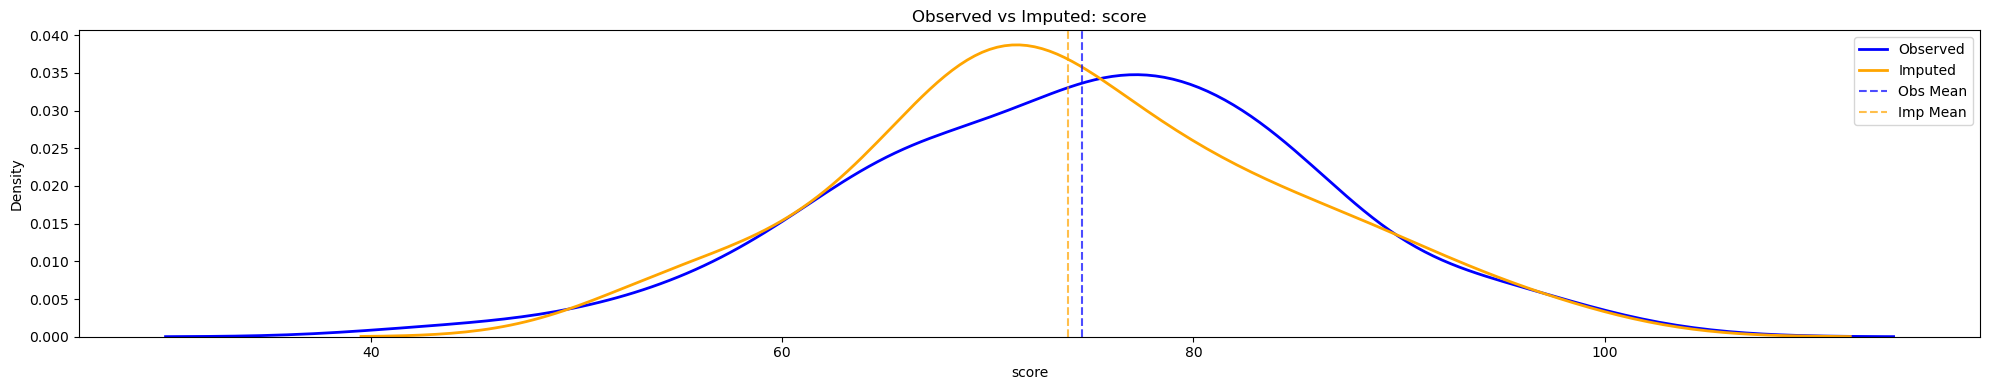

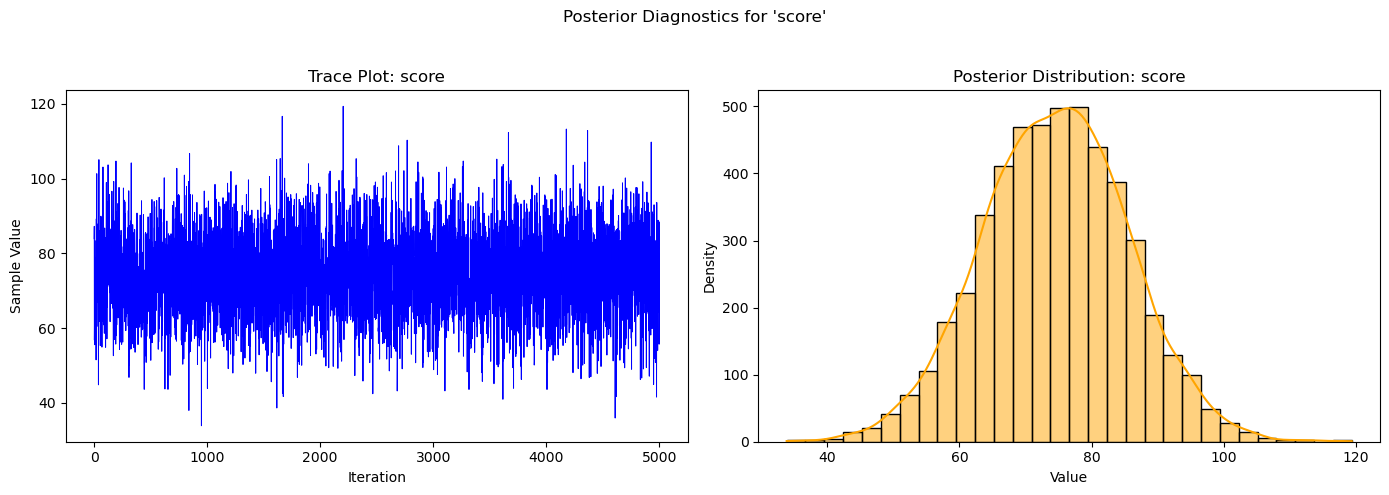

[Overfitting Evaluation]
 - score: RMSE=12.0976, Coverage=60.00%, Width=22.5628


{'score': {'RMSE': 12.097600991400538,
  'Coverage_95%': 0.6,
  'Avg_Credible_Interval_Width': 22.562770325076933}}

In [16]:
# ➤ Gibbs Sampling Imputation
imputer_gibbs.generate_multiple_imputations()
imputer_gibbs.visualize_imputations()
imputer_gibbs.posterior_diagnostics()
imputer_gibbs.evaluate_overfitting()


[Impute] Running metropolis sampling...
[MH] Starting Metropolis-Hastings sampling...
[MH] Imputation 1 completed.
[MH] Imputation 2 completed.
[MH] Imputation 3 completed.
[MH] Imputation 4 completed.
[MH] Imputation 5 completed.
[MH] Metropolis-Hastings sampling finished.
[Impute] Imputation complete.
[Visualize Imputations] Generating plots for observed vs. imputed distributions...


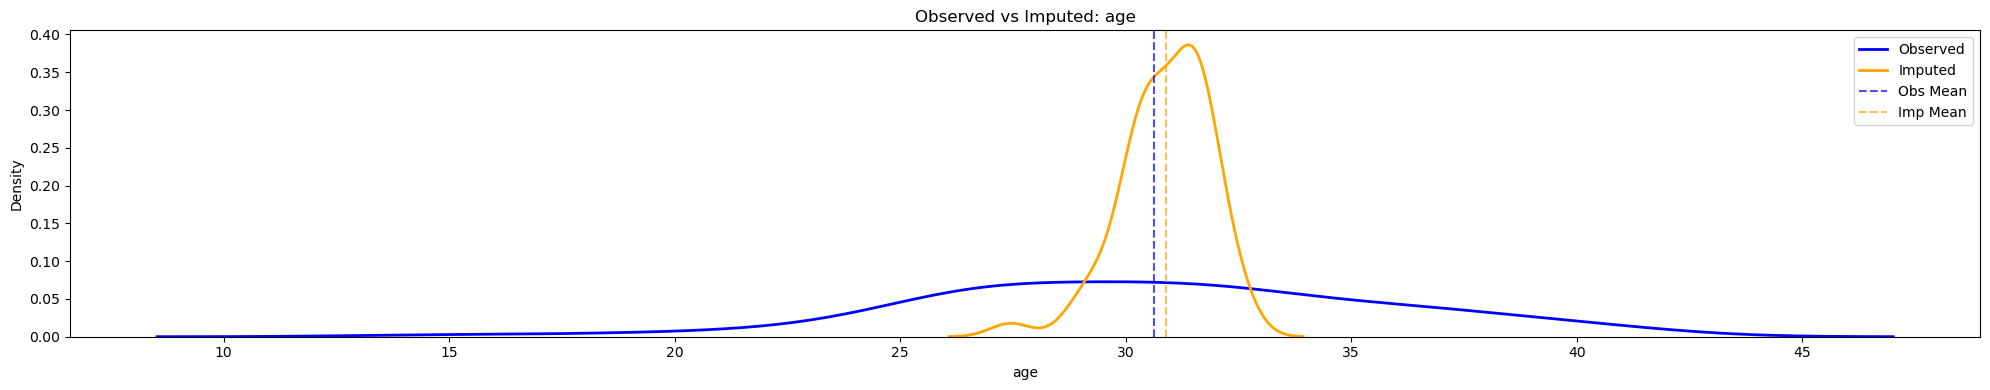

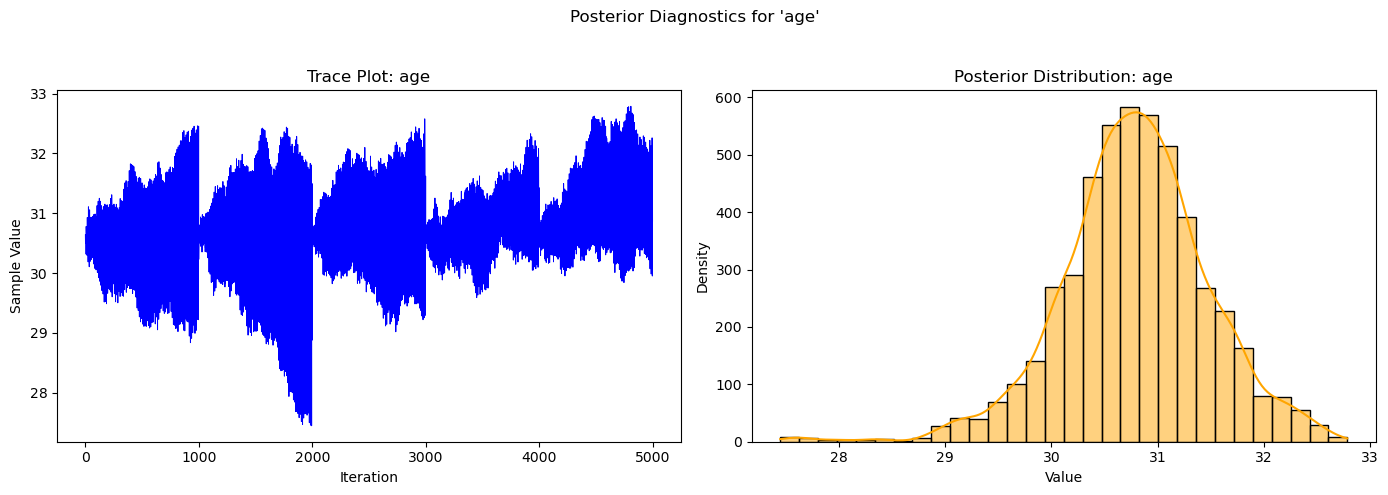

[Overfitting Evaluation]
 - age: RMSE=3.6018, Coverage=30.00%, Width=2.1397


{'age': {'RMSE': 3.601832564708783,
  'Coverage_95%': 0.3,
  'Avg_Credible_Interval_Width': 2.139667077938645}}

In [17]:
# ➤ Metropolis-Hastings Imputation
imputer_mh.generate_multiple_imputations()
imputer_mh.visualize_imputations()
imputer_mh.posterior_diagnostics()
imputer_mh.evaluate_overfitting()


## Comparison with PyMC

To validate our implementation, we compare the imputed values and uncertainty estimates against **PyMC**, a popular probabilistic programming framework for Bayesian inference.

We'll use PyMC to model one of the features with missing data (e.g., `income`) using observed predictors, then compare its imputations to those generated by our custom imputer.
